In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [ ]:
df = pd.read_csv("utlc_apps.csv")
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,2483729,eu curtindo muito,eu curtindo muito,"['eu', 'curtindo', 'muito']",1.0,5.0,1,1
1,2865805,Aplicativo absurdamente caro e o valor para se...,aplicativo absurdamente caro e o valor para se...,"['aplicativo', 'absurdamente', 'caro', 'valor'...",0.0,1.0,1,1
2,2734161,Não é mais tão simples com o novo layout,nao e mais tao simples com o novo layout,"['nao', 'mais', 'tao', 'simples', 'com', 'novo...",1.0,4.0,1,1
3,2066362,"Estava com um problema para acessar, porém con...","estava com um problema para acessar, porem con...","['estava', 'com', 'um', 'problema', 'para', 'a...",1.0,5.0,1,1
4,2521806,Eu gostei muito do jogo tenho no celular da mi...,eu gostei muito do jogo tenho no celular da mi...,"['eu', 'gostei', 'muito', 'do', 'jogo', 'tenho...",1.0,5.0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039535 entries, 0 to 1039534
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   original_index         1039535 non-null  int64  
 1   review_text            1039535 non-null  object 
 2   review_text_processed  1039535 non-null  object 
 3   review_text_tokenized  1039535 non-null  object 
 4   polarity               968858 non-null   float64
 5   rating                 1039535 non-null  float64
 6   kfold_polarity         1039535 non-null  int64  
 7   kfold_rating           1039535 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 63.4+ MB


In [ ]:
df.describe(include='all')

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
count,1.039535e+06,1039535,1039535,1039535,968858.000000,1.039535e+06,1.039535e+06,1.039535e+06
unique,NaN,809226,789503,752098,NaN,NaN,NaN,NaN
top,NaN,muito bom,muito bom,"['muito', 'bom']",NaN,NaN,NaN,NaN
freq,NaN,17946,32574,44575,NaN,NaN,NaN,NaN
mean,2.360784e+06,NaN,NaN,NaN,0.774875,3.956310e+00,5.058063e+00,5.499988e+00
std,3.007645e+05,NaN,NaN,NaN,0.417665,1.528255e+00,3.219676e+00,2.872283e+00
min,1.839851e+06,NaN,NaN,NaN,0.000000,1.000000e+00,-1.000000e+00,1.000000e+00
25%,2.100290e+06,NaN,NaN,NaN,1.000000,3.000000e+00,2.000000e+00,3.000000e+00
50%,2.360868e+06,NaN,NaN,NaN,1.000000,5.000000e+00,5.000000e+00,5.000000e+00
75%,2.621226e+06,NaN,NaN,NaN,1.000000,5.000000e+00,8.000000e+00,8.000000e+00


In [ ]:
df.isna().sum()

,0
original_index,0
review_text,0
review_text_processed,0
review_text_tokenized,0
polarity,70677
rating,0
kfold_polarity,0
kfold_rating,0


In [ ]:
df['review_text'] = df['review_text'].astype(str)
df = df[df['review_text'].str.strip() != ""]
df.shape

(1039535, 8)

In [ ]:
df['review_text_processed'] = df['review_text_processed'].astype(str)
df = df[df['review_text_processed'].str.strip() != ""]
df.shape

(1039535, 8)

In [ ]:
df['review_text_tokenized'] = df['review_text_tokenized'].astype(str)
df = df[df['review_text_tokenized'].str.strip() != ""]
df.shape

(1039535, 8)

In [ ]:
def rating_to_sentiment(r):
    if r >= 4:
        return "positive"
    elif r == 3:
        return "neutral"
    else:
        return "negative"

df["label"] = df["rating"].apply(rating_to_sentiment)
df["label"].value_counts(normalize=True)

,proportion
label,
positive,0.722192
negative,0.209819
neutral,0.067989


In [ ]:
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating,label
0,2483729,eu curtindo muito,eu curtindo muito,"['eu', 'curtindo', 'muito']",1.0,5.0,1,1,positive
1,2865805,Aplicativo absurdamente caro e o valor para se...,aplicativo absurdamente caro e o valor para se...,"['aplicativo', 'absurdamente', 'caro', 'valor'...",0.0,1.0,1,1,negative
2,2734161,Não é mais tão simples com o novo layout,nao e mais tao simples com o novo layout,"['nao', 'mais', 'tao', 'simples', 'com', 'novo...",1.0,4.0,1,1,positive
3,2066362,"Estava com um problema para acessar, porém con...","estava com um problema para acessar, porem con...","['estava', 'com', 'um', 'problema', 'para', 'a...",1.0,5.0,1,1,positive
4,2521806,Eu gostei muito do jogo tenho no celular da mi...,eu gostei muito do jogo tenho no celular da mi...,"['eu', 'gostei', 'muito', 'do', 'jogo', 'tenho...",1.0,5.0,1,1,positive


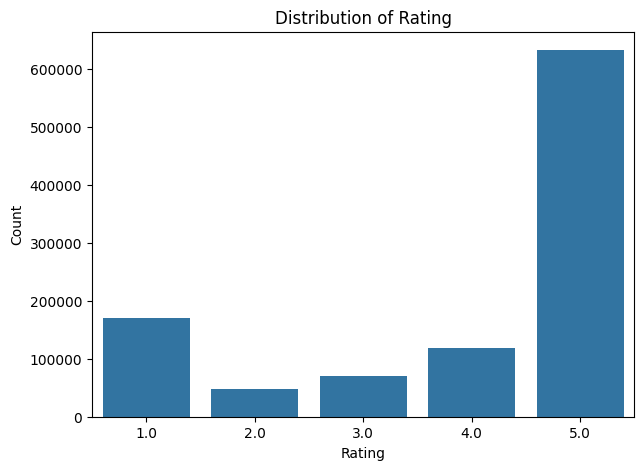

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
df["text"] = df["review_text_processed"]

<Axes: title={'center': 'Distribuição de Sentimentos (Rating → Label)'}, xlabel='label'>

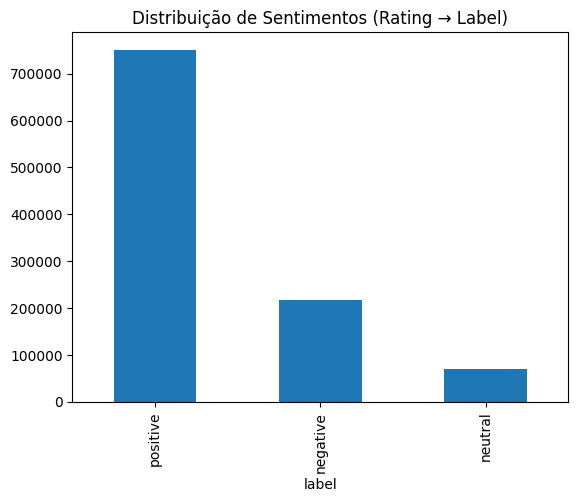

In [ ]:
df["label"].value_counts().plot(kind="bar", title="Distribuição de Sentimentos (Rating → Label)")

In [ ]:
df["text_len"] = df["text"].str.len()
df["text_len"].describe()

,text_len
count,1.039535e+06
mean,7.146437e+01
std,8.261916e+01
min,1.000000e+00
25%,1.800000e+01
50%,4.400000e+01
75%,9.400000e+01
max,3.344000e+03


In [ ]:
train_df = df[df["kfold_rating"] != 0]
test_df  = df[df["kfold_rating"] == 0]

X_train = train_df["text"]
y_train = train_df["label"]

X_test  = test_df["text"]
y_test  = test_df["label"]

In [ ]:
FOLD_TESTE = 5

train_df = df[df["kfold_rating"] != FOLD_TESTE]
test_df  = df[df["kfold_rating"] == FOLD_TESTE]

X_train = train_df["text"]
y_train = train_df["label"]

X_test  = test_df["text"]
y_test  = test_df["label"]

print(len(X_train), len(X_test))

935581 103954


In [ ]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords_pt = stopwords.words("portuguese")
len(stopwords_pt)

207

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2),
    stop_words=stopwords_pt
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=500,
    class_weight="balanced",
    n_jobs=-1
)

model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1)

In [ ]:
from sklearn.metrics import classification_report

preds = model.predict(X_test_vec)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    negative       0.77      0.75      0.76     21811
     neutral       0.20      0.53      0.29      7068
    positive       0.96      0.82      0.89     75075

    accuracy                           0.79    103954
   macro avg       0.64      0.70      0.65    103954
weighted avg       0.87      0.79      0.82    103954



In [ ]:
import joblib

pipeline = {
    "vectorizer": tfidf,
    "model": model,
    "sentiment_map": {
        "positive": "Positivo",
        "neutral": "Neutro",
        "negative": "Negativo"
    },
    "rating_rule": "1-2=negative, 3=neutral, 4-5=positive"
}

joblib.dump(pipeline, "modelo_utlc_apps_sentimento.pkl")

['modelo_utlc_apps_sentimento.pkl']